In [29]:
# importing the neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from sklearn.metrics import mean_absolute_error, mean_squared_error
import scipy.stats as stats
from statsmodels.stats.diagnostic import het_breuschpagan
import plotly.express as px
from sklearn.model_selection import train_test_split

plt.style.use('ggplot')

# ignoring future warnings
import warnings

warnings.simplefilter(action = 'ignore', category = FutureWarning)

Exploratory Data Analysis EDA

In [5]:
# reading the csv file
df = pd.read_csv('insurance dataset/insurance.csv')

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
df.shape

(1338, 7)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<Axes: >

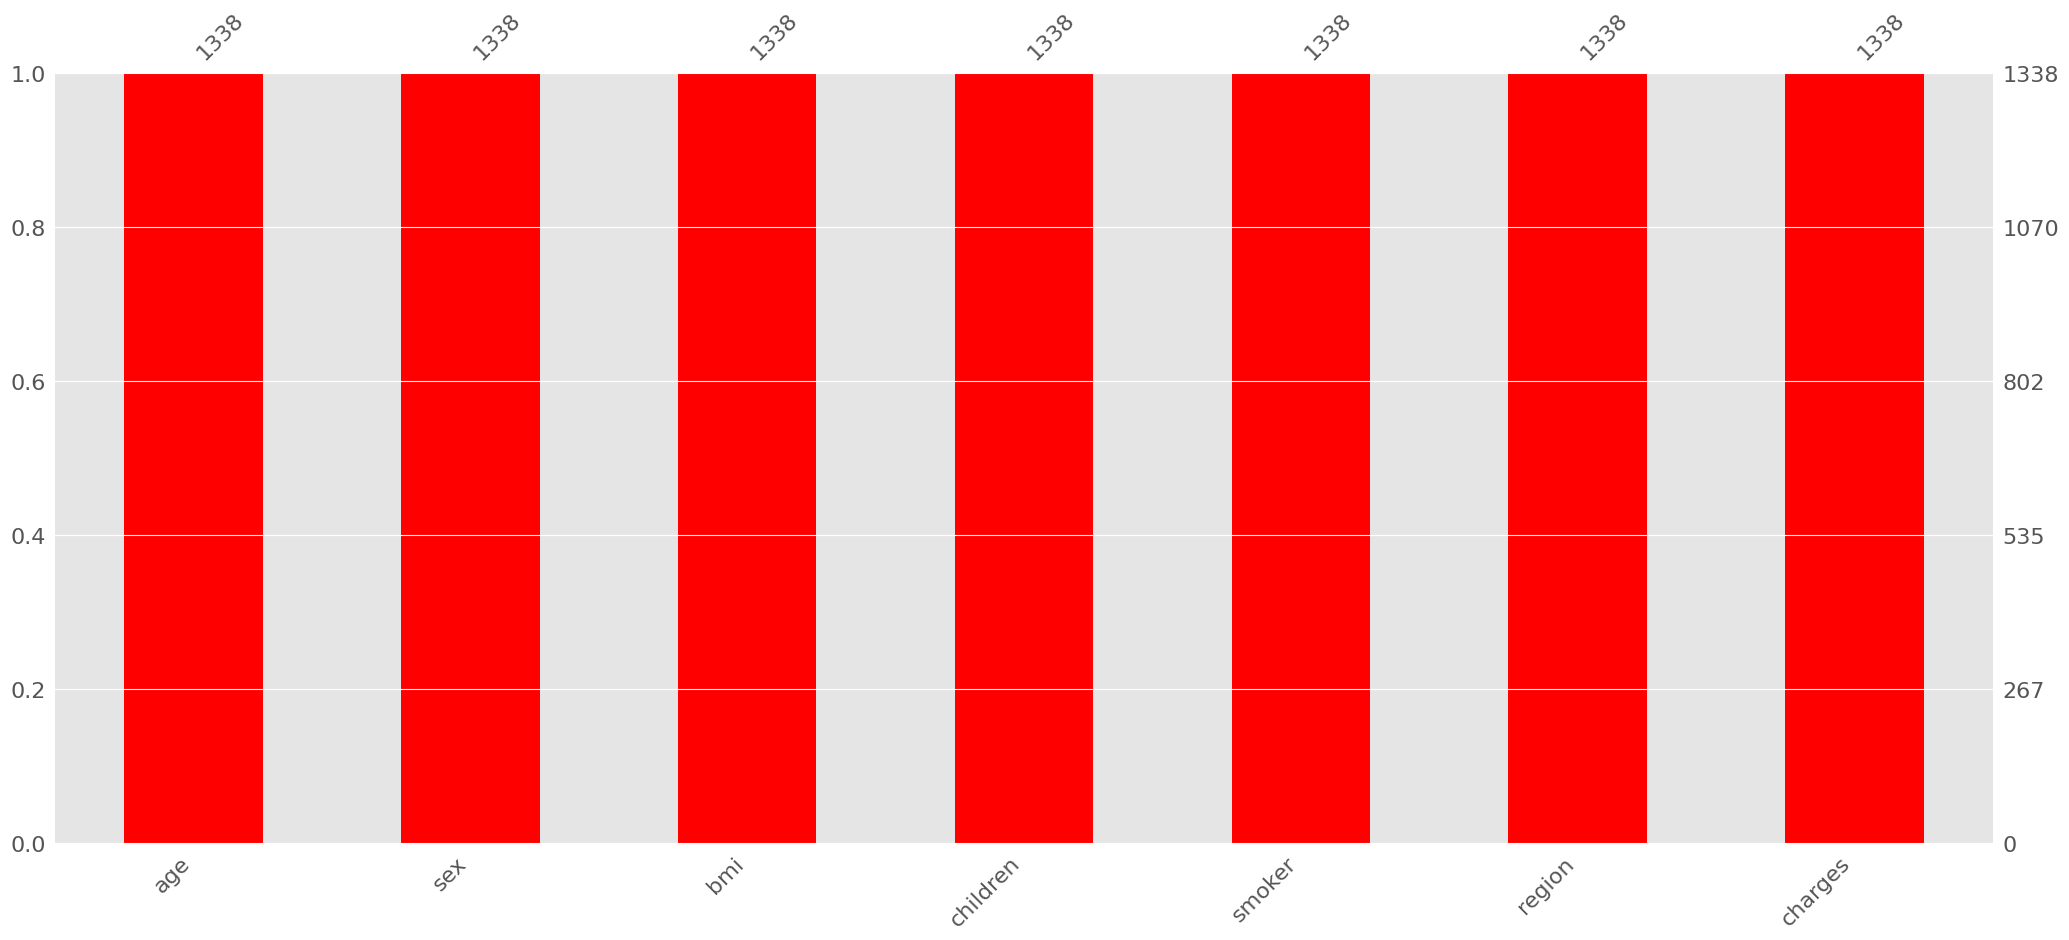

In [11]:
import missingno as ms

ms.bar(df, color='red')

visualization of our dependent variable with our independent variable

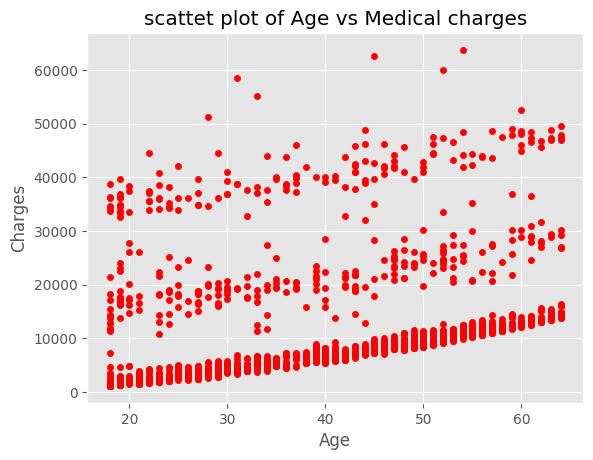

In [12]:
df.plot(x='age', y='charges', kind ='scatter', color='red')

# adding labels and titles
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('scattet plot of Age vs Medical charges')

plt.show()

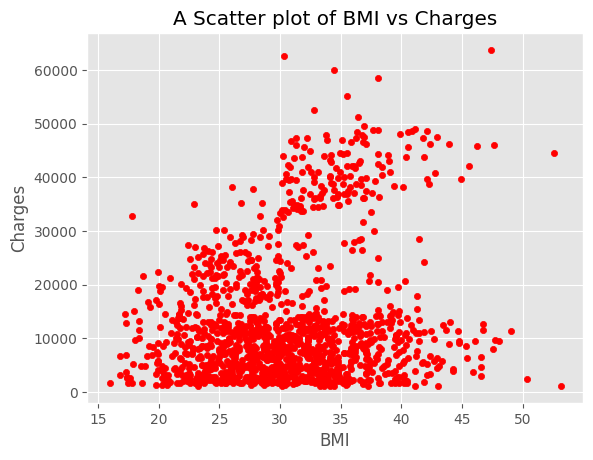

In [13]:
df.plot(x= 'bmi', y='charges', kind = 'scatter', color = 'red')

plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('A Scatter plot of BMI vs Charges')
plt.show()

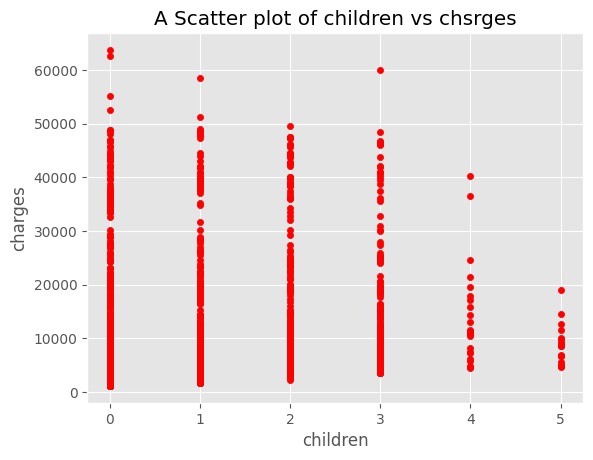

In [14]:
df.plot(x='children', y='charges', kind='scatter', color='red')

plt.xlabel('children')
plt.ylabel('charges')
plt.title('A Scatter plot of children vs chsrges')

plt.show()

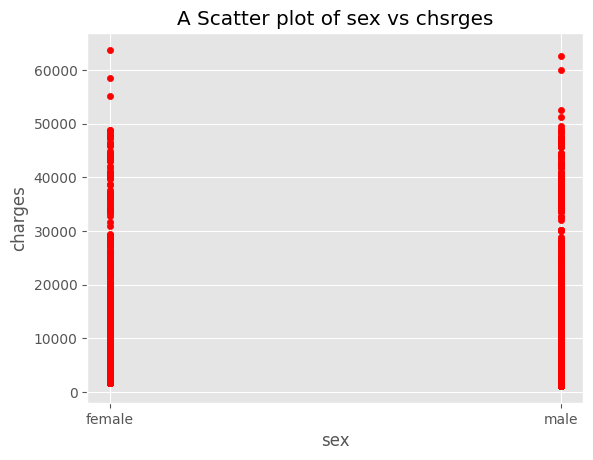

In [15]:
df.plot(x='sex', y='charges', kind='scatter', color='red')

plt.xlabel('sex')
plt.ylabel('charges')
plt.title('A Scatter plot of sex vs chsrges')

plt.show()

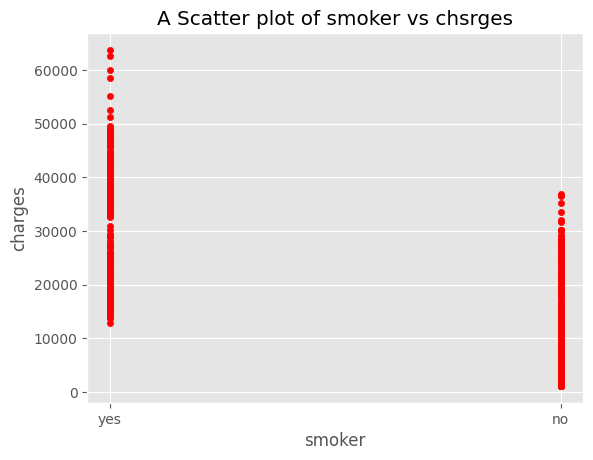

In [16]:
df.plot(x='smoker', y='charges', kind='scatter', color='red')

plt.xlabel('smoker')
plt.ylabel('charges')
plt.title('A Scatter plot of smoker vs chsrges')

plt.show()

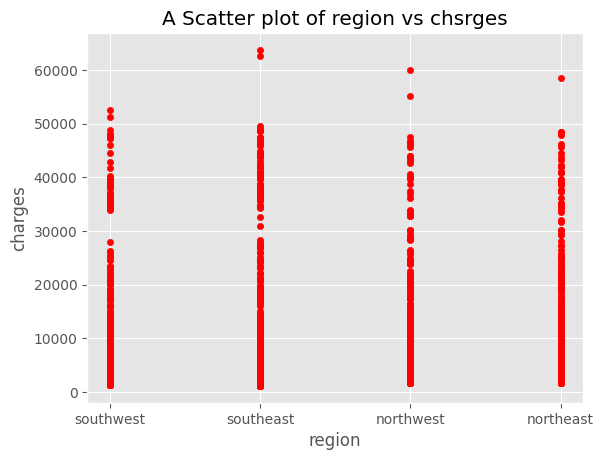

In [17]:
df.plot(x='region', y='charges', kind='scatter', color='red')

plt.xlabel('region')
plt.ylabel('charges')
plt.title('A Scatter plot of region vs chsrges')

plt.show()

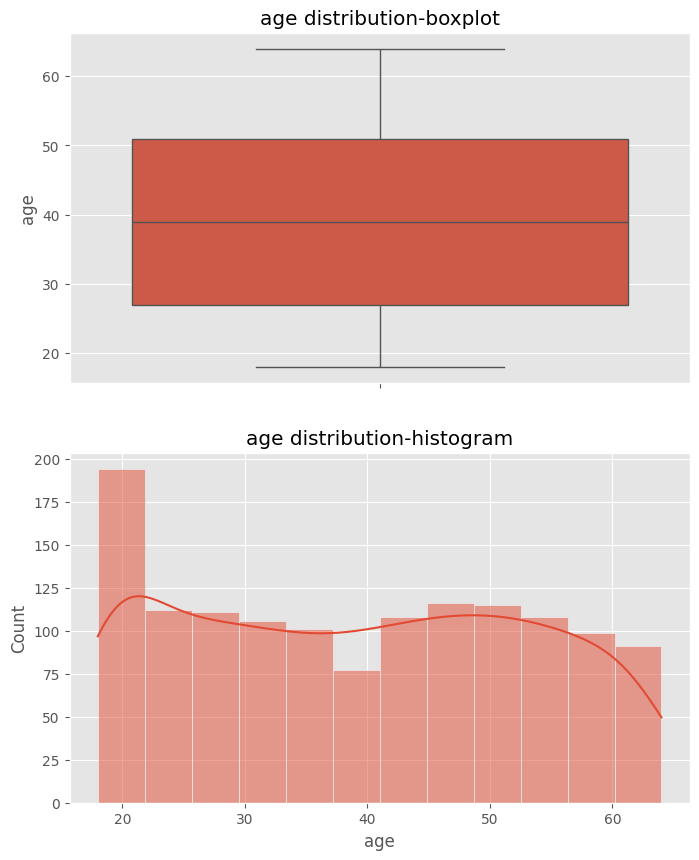

In [18]:
fig, axs = plt.subplots(nrows=2, figsize=(8, 10))

sns.boxplot(df['age'],ax=axs[0]).set(title='age distribution-boxplot')

sns.histplot(df['age'],ax=axs[1], kde=True).set(title='age distribution-histogram')

plt.show()

In [19]:
fig = px.histogram(df, x='age', color='sex', title='Age distribution according to sex',nbins = 60,width = 600, height= 400)

fig.show()

In [20]:
fig = px.histogram(df, x='bmi', color='sex',title='bmi distribution according to sex',width = 700, height= 400)

fig.show()

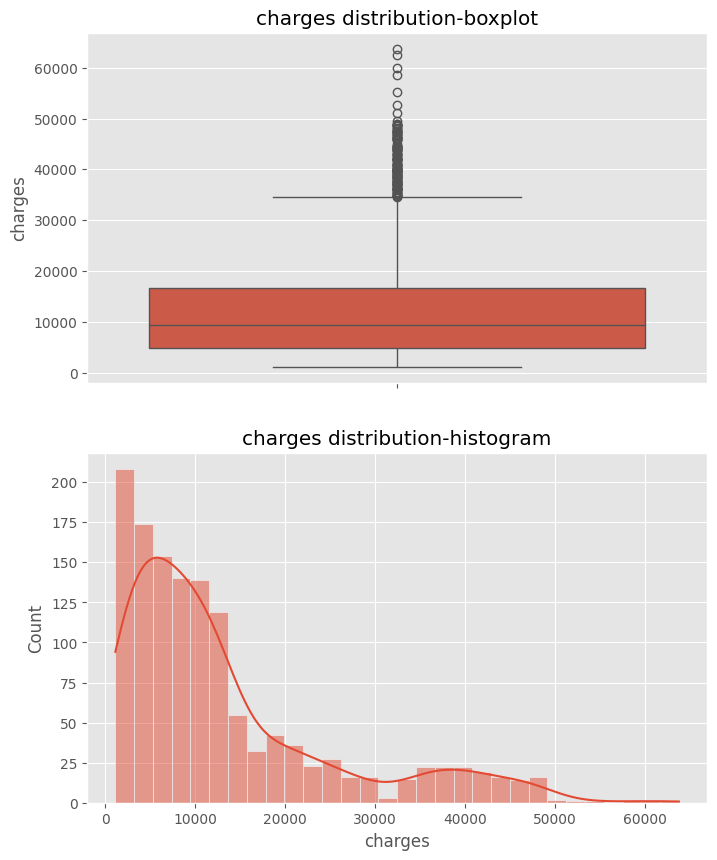

In [21]:
fig, axs = plt.subplots(nrows=2, figsize=(8, 10))

sns.boxplot(df['charges'],ax=axs[0]).set(title='charges distribution-boxplot')

sns.histplot(df['charges'],ax=axs[1], kde=True).set(title='charges distribution-histogram')

plt.show()

In [22]:
fig = px.box(df, x=['charges'],y=df['sex'],color = 'sex',title = 'charges vs sex',width = 700, height= 400)

fig.show()

In [23]:
fig = px.box(df, x=['charges'],y=df['region'], color = 'sex',title = 'Boxplot of medical charges vs region',width = 700, height= 600)

fig.show()

In [24]:
fig = px.box(df, x=['charges'],y=df['smoker'],color = 'sex',title = 'Box plot of charges vs smoker',width = 700, height= 500)

fig.show()

In [25]:
fig = px.box(df, x=['charges'],y=df['sex'],color = 'sex',title = 'Box plot of charges vs sex',width = 700, height= 400)

fig.show()

Correlation Matrix

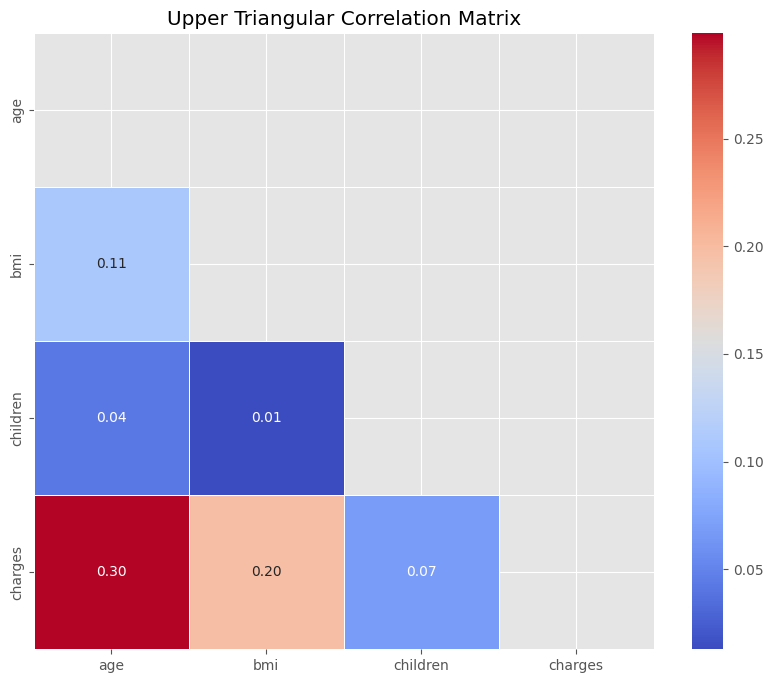

In [26]:
# Select only numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_df = df[numeric_columns]

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a mask for the upper triangular matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a heatmap for visualization with the mask
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, mask=mask)
plt.title('Upper Triangular Correlation Matrix')
plt.show()

Data-Encoding

In [27]:
df_en = pd.get_dummies(data = df, prefix = 'ENC', prefix_sep='_',

columns = ['sex','children', 'smoker', 'region'],

drop_first =True,

dtype='int8')

df_en

,age,bmi,charges,ENC_male,ENC_1,ENC_2,ENC_3,ENC_4,ENC_5,ENC_yes,ENC_northwest,ENC_southeast,ENC_southwest
0,19,27.900,16884.92400,0,0,0,0,0,0,1,0,0,1
1,18,33.770,1725.55230,1,1,0,0,0,0,0,0,1,0
2,28,33.000,4449.46200,1,0,0,1,0,0,0,0,1,0
3,33,22.705,21984.47061,1,0,0,0,0,0,0,1,0,0
4,32,28.880,3866.85520,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,10600.54830,1,0,0,1,0,0,0,1,0,0
1334,18,31.920,2205.98080,0,0,0,0,0,0,0,0,0,0
1335,18,36.850,1629.83350,0,0,0,0,0,0,0,0,1,0
1336,21,25.800,2007.94500,0,0,0,0,0,0,0,0,0,1


In [31]:
#Correlation with output variable

cor_target = df_en.corr()["charges"].abs().sort_values()
cor_target

ENC_1            0.002366
ENC_male         0.005632
ENC_5            0.012394
ENC_southeast    0.015791
ENC_northwest    0.017824
ENC_4            0.039085
ENC_southwest    0.041632
ENC_2            0.101524
ENC_3            0.107200
bmi              0.132669
age              0.527834
ENC_yes          0.665506
charges          1.000000
Name: charges, dtype: float64

In [32]:
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

ENC_2      0.101524
ENC_3      0.107200
bmi        0.132669
age        0.527834
ENC_yes    0.665506
charges    1.000000
Name: charges, dtype: float64

In [33]:
# Keeping the most related colums and the categorical columns
columns_to_keep = ['charges',
                    'ENC_yes',
                    'age',
                    'bmi',
                    'ENC_3',
                    'ENC_2']
# Drop columns not in the specified list
df_enc = df_en[columns_to_keep]
df_enc.head()

,charges,ENC_yes,age,bmi,ENC_3,ENC_2
0,9.734176,1,19,27.900,0,0
1,7.453302,0,18,33.770,0,0
2,8.400538,0,28,33.000,1,0
3,9.998092,0,33,22.705,0,0
4,8.260197,0,32,28.880,0,0


Log Transformation of The Response Variable

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4668\1227675538.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4668\1227675538.py:9: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



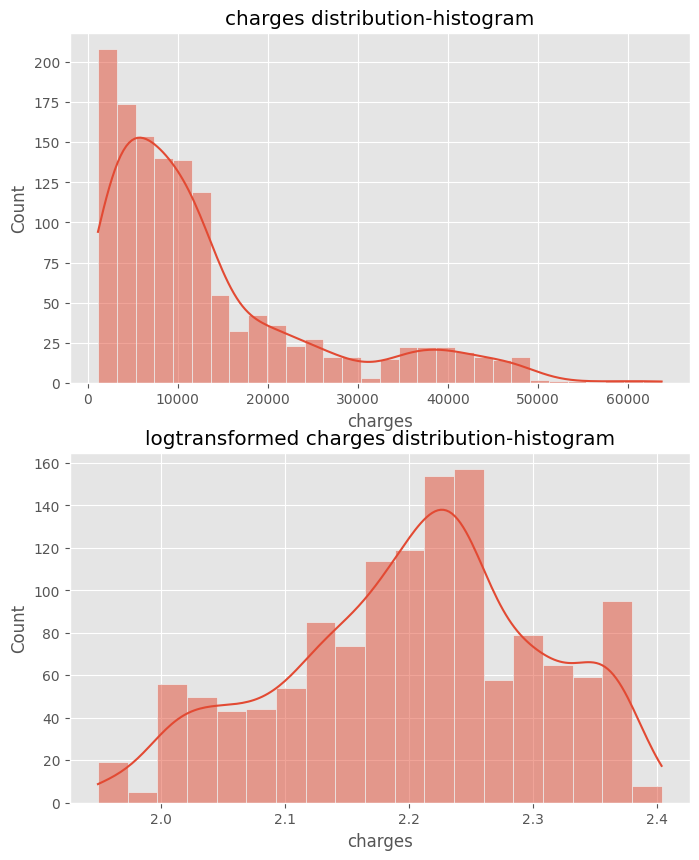

In [34]:
fig, axs = plt.subplots(nrows=2, figsize=(8, 10))

sns.histplot(df['charges'],ax=axs[0], kde=True).set(title='charges distribution-histogram')

df_enc['charges'] = np.log(df_enc['charges'])

sns.histplot(df_enc['charges'],ax=axs[1], kde=True).set(title='logtransformed charges distribution-histogram')

fig.show()

Data Splitting

In [35]:
train, test = train_test_split(df_enc,test_size=0.25, random_state = 16)

X_train = train.drop('charges', axis = 1)
X_test = test.drop('charges', axis = 1)
y_train = train['charges']
y_test = test['charges']

print('shape of train data', X_train.shape, y_train.shape)
print('shape of test data', X_test.shape, y_test.shape)

shape of train data (1003, 5) (1003,)
shape of test data (335, 5) (335,)


Model Building

In [36]:
#Defining the X and y

X = df_enc[['ENC_yes',
            'age',
            'bmi',
            'ENC_3',
            'ENC_2']]

y = df['charges']

In [38]:
#building the baseline model
simple_formula = "charges  ~ ENC_yes"
simple_model = ols(simple_formula, data=df_enc).fit()
simple_model_summary = simple_model.summary()
print(simple_model_summary)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     917.7
Date:                Fri, 02 Feb 2024   Prob (F-statistic):          6.83e-154
Time:                        20:38:04   Log-Likelihood:                 1499.0
No. Observations:                1338   AIC:                            -2994.
Df Residuals:                    1336   BIC:                            -2984.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1697      0.002    896.064      0.0

In [39]:
#checking the mean absolute error for the model

predicted_charges = simple_model.predict(df_enc['ENC_yes'])

mae = mean_absolute_error(df_enc['charges'], predicted_charges)

mae

0.06319399368905254

Multiple Linear Regression

In [42]:
#Including all the other variables in the model
multiple_formula = 'charges ~ ENC_yes + age + bmi + ENC_3 + ENC_2'
multiple_model = ols(multiple_formula, df_enc).fit()
multiple_model_summary = multiple_model.summary()
print(multiple_model_summary)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     766.4
Date:                Fri, 02 Feb 2024   Prob (F-statistic):               0.00
Time:                        20:49:07   Log-Likelihood:                 2055.7
No. Observations:                1338   AIC:                            -4099.
Df Residuals:                    1332   BIC:                            -4068.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9729      0.008    245.052      0.0

Model Diagnostics

Checking Multicolinearity

In [43]:
#calculating the variance inflation factor for the variables

df_vif_data  = X



vif_result = [round(VIF(X.values, i)) for i in range(X.shape[1])]

dict(zip(df_vif_data, vif_result))

{'ENC_yes': 1, 'age': 8, 'bmi': 8, 'ENC_3': 1, 'ENC_2': 1}

ValueError: num must be an integer with 1 <= num <= 4, not 5

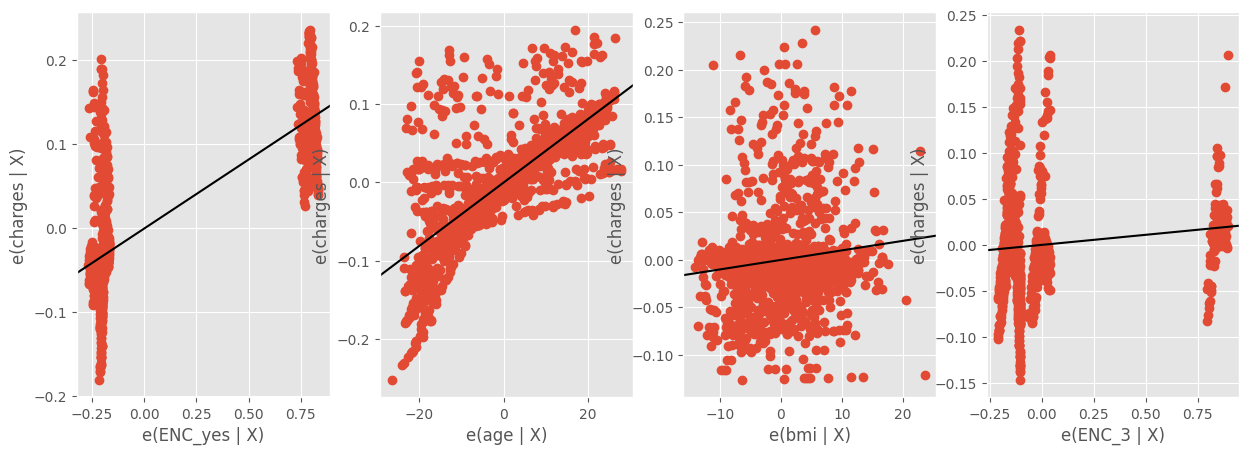

In [44]:
#plotting the partial regression plots

fig = plt.figure(figsize= (15, 5))

sm.graphics.plot_partregress_grid(multiple_model, exog_idx= ['ENC_yes', 'age', 'bmi', 'ENC_3', 'ENC_2'],
                                                             grid= (1,4),
                                                             fig=  fig)
plt.tight_layout();

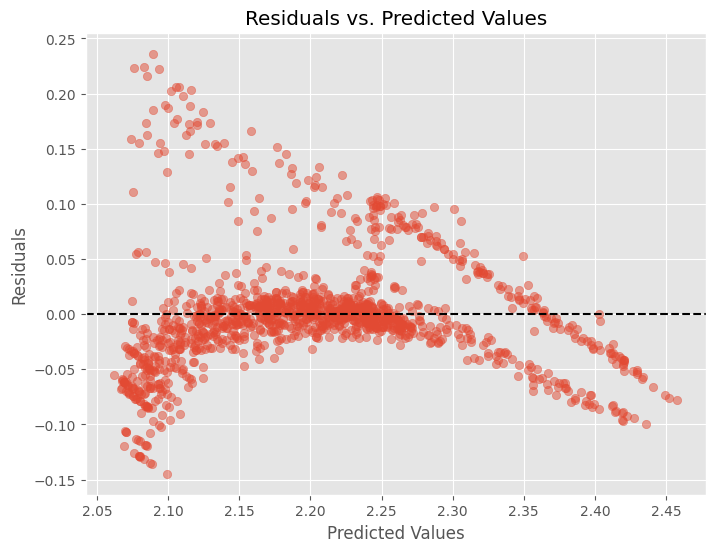

In [45]:
# Get the predicted values and residuals

predicted_values = multiple_model.predict()
residuals = multiple_model.resid

# Create a scatterplot of predicted values vs. residuals
plt.figure(figsize=(8, 6))
plt.scatter(predicted_values, residuals, alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

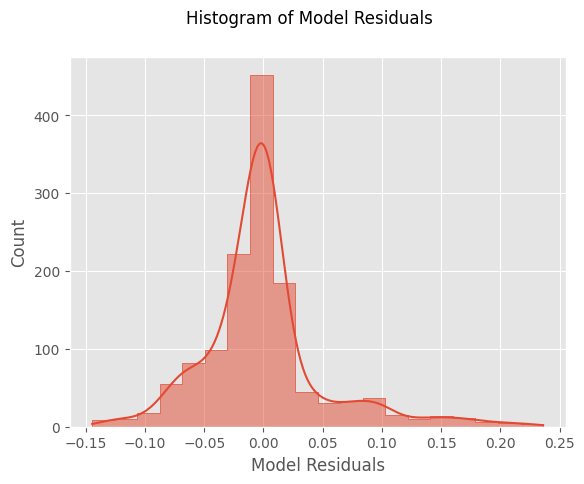

In [46]:
#Histogram of the model residuals
fig, ax = plt.subplots()
sns.histplot(multiple_model.resid, bins=20, element="step", kde=True, ax=ax)
ax.set_xlabel("Model Residuals")
fig.suptitle("Histogram of Model Residuals");